# 线性回归综述-实战

## 生成数据集

我们构造一个简单的人工训练数据集，它可以使我们能够直观比较学到的参数和真实的模型参数的区别。设数据集样本数为10，输入个数（特征数）为1。给定随机生成的批量样本特征$\boldsymbol{X} \in \mathbb{R}^{10 \times 1}$，我们使用线性回归模型真实权重$\boldsymbol{w} = 2$和偏差$b = 4.2$，以及一个随机噪音项$\epsilon$来生成标签

$$\boldsymbol{y} = \boldsymbol{X}\boldsymbol{w} + b + \epsilon,$$

其中噪音项$\epsilon$服从均值为0和标准差为0.3的正态分布。下面，让我们生成数据集并查看数据分布情况。

Text(0, 0.5, 'y')

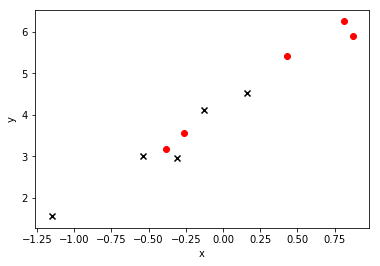

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(1)
true_w = 2
true_b = 4.2
x = np.random.normal(scale=0.5, size=(10, 1))
y = true_w * x + true_b
y += np.random.normal(scale=0.3, size=y.shape)

# 使用sklearn.model_selection里的train_test_split模块用于分割数据。
from sklearn.model_selection import train_test_split
# 随机采样50%的数据用于测试，剩下的50%用于构建训练集合。
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=33)

plt.scatter(x_train, y_train, marker='o',c = 'red')
plt.scatter(x_test, y_test, marker='x',c = 'black')
plt.xlabel("x")
plt.ylabel("y")

w: 2.343
b: 4.172
error(train): 0.020
error(test): 0.031


Text(0, 0.5, 'y')

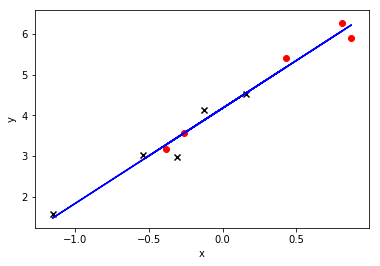

In [2]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_1 = lr.predict(x_test)
y_pred_0 = lr.predict(x_train)
print('w: %.3f' % lr.coef_[0][0])
print('b: %.3f' % lr.intercept_[0])
e_train = sum((y_pred_0 - y_train)**2) / (2*len(y_train))
print('error(train): %.3f' % ( sum((y_pred_0 - y_train)**2) / (2*len(y_train))))
print('error(test): %.3f' % ( sum((y_pred_1 - y_test)**2) / (2*len(y_test))))

plt.plot(x, lr.coef_[0][0] * x + lr.intercept_[0], 'b-')
plt.scatter(x_train, y_train, marker='o',c = 'red')
plt.scatter(x_test, y_test, marker='x',c = 'black')
plt.xlabel("x")
plt.ylabel("y")

w:  [ 2.86658688 -1.08525663]
b:  4.413751215791502
error(train): 0.010
error(test): 0.410


Text(0, 0.5, 'y')

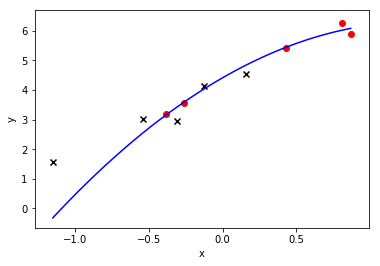

In [3]:
x1 = np.concatenate((x,x**2), axis=1)

# 使用sklearn.model_selection里的train_test_split模块用于分割数据。
from sklearn.model_selection import train_test_split
# 随机采样50%的数据用于测试，剩下的50%用于构建训练集合。
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.5, random_state=33)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_1 = lr.predict(x_test)
y_pred_0 = lr.predict(x_train)
print('w: ', lr.coef_[0])
print('b: ', lr.intercept_[0])
print('error(train): %.3f' % ( sum((y_pred_0 - y_train)**2) / (2*len(y_train))))
print('error(test): %.3f' % ( sum((y_pred_1 - y_test)**2) / (2*len(y_test))))

x1 = np.arange(min(x1[:,0]), max(x1[:,0]), 0.02).reshape(-1, 1)
plt.plot(x1, np.dot(np.concatenate((x1,x1**2), axis=1),lr.coef_[0].reshape(2,1)) + lr.intercept_[0], 'b-')
plt.scatter(x_train[:,0], y_train, marker='o',c = 'red')
plt.scatter(x_test[:,0], y_test, marker='x',c = 'black')
plt.xlabel("x")
plt.ylabel("y")

w:  [ 2.99088161  0.11409154 -1.35698602]
b:  4.267593723570964
error(train): 0.009
error(test): 0.247


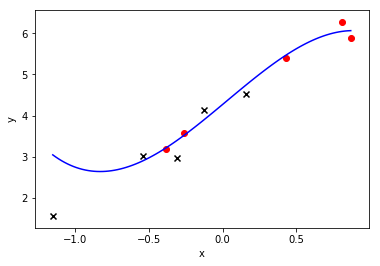

In [4]:
x1 = np.concatenate((x,x**2,x**3), axis=1)

# 使用sklearn.model_selection里的train_test_split模块用于分割数据。
from sklearn.model_selection import train_test_split
# 随机采样50%的数据用于测试，剩下的50%用于构建训练集合。
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.5, random_state=33)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_1 = lr.predict(x_test)
y_pred_0 = lr.predict(x_train)
print('w: ', lr.coef_[0])
print('b: ', lr.intercept_[0])
print('error(train): %.3f' % ( sum((y_pred_0 - y_train)**2) / (2*len(y_train))))
print('error(test): %.3f' % ( sum((y_pred_1 - y_test)**2) / (2*len(y_test))))

x2 = np.arange(min(x1[:,0]), max(x1[:,0]), 0.02).reshape(-1, 1)
plt.plot(x2, np.dot(np.concatenate((x2,x2**2,x2**3), axis=1),lr.coef_[0].reshape(3,1)) + lr.intercept_[0], 'b-')
plt.scatter(x_train[:,0], y_train, marker='o',c = 'red')
plt.scatter(x_test[:,0], y_test, marker='x',c = 'black')
plt.xlabel("x")
plt.ylabel("y")
image = plt.show